In [5]:
from synthetic.galaxy import add_galaxy,add_random_galaxy

import numpy as np
from random import randint

import acalib.algorithms.stacking

import matplotlib.pyplot as plt
%matplotlib inline

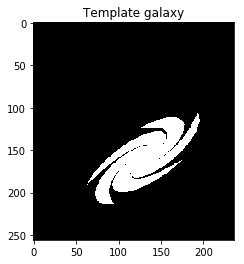

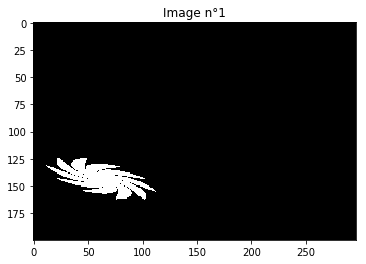

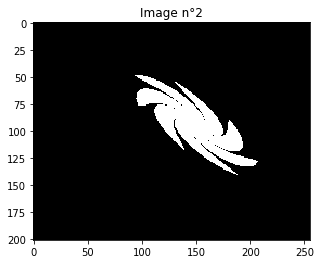

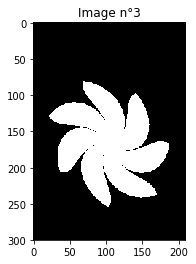

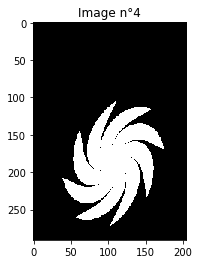

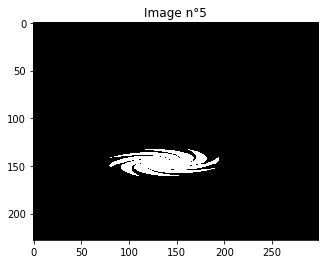

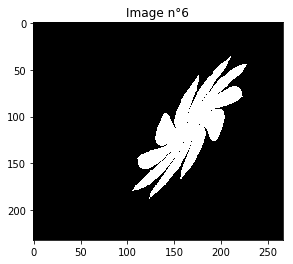

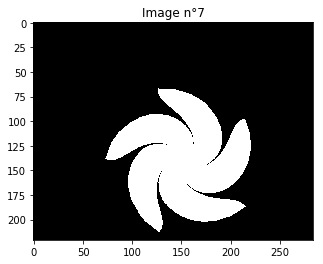

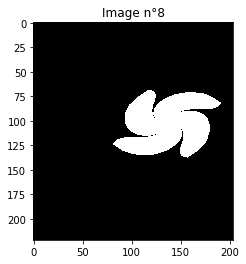

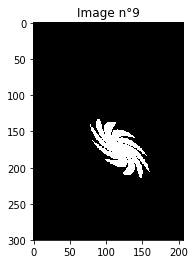

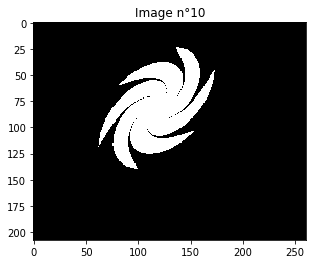

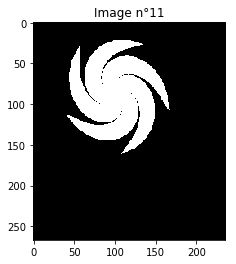

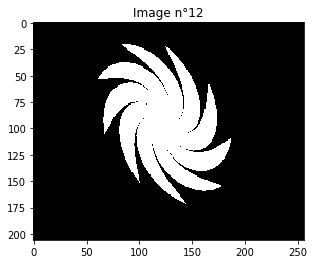

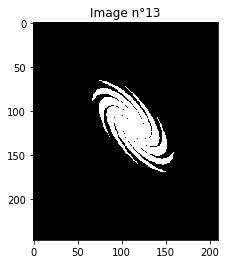

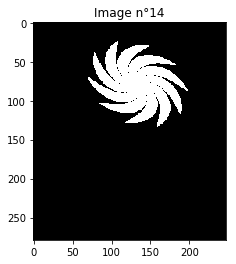

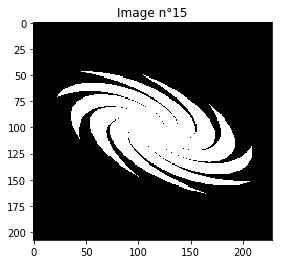

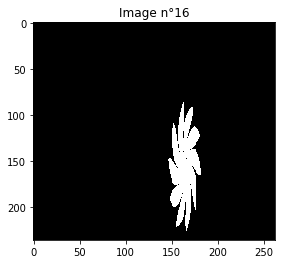

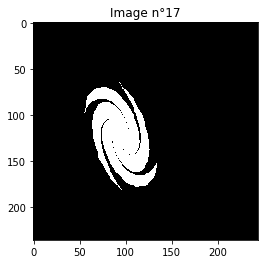

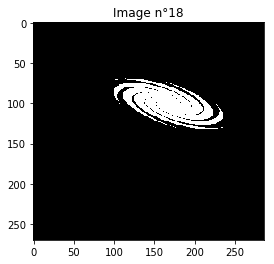

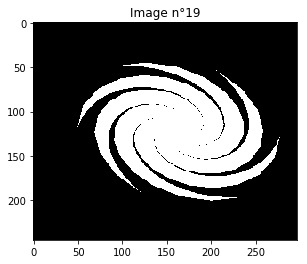

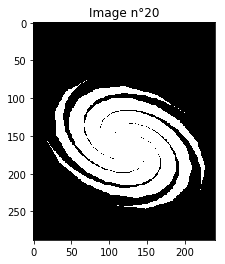

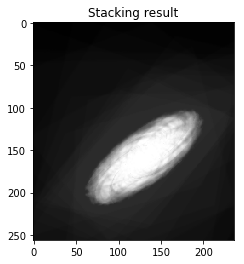

In [6]:
# Create random images with galaxies
N_IMAGES = 20

images = []
for i in range(N_IMAGES+1):
    # Create image of random size:
    width = randint(200,300)
    height = randint(200,300)
    img = np.ones((height,width))
    # Put a random galaxy on it:
    add_random_galaxy(img,value=5)
    # Save the image:
    images.append(img)
    

# Display the TEMPLATE
plt.title("Template galaxy")
plt.imshow(images[0],cmap='gray')
plt.show()
# Display the other images:
for i in range(1,N_IMAGES+1):
    plt.title("Image n°%d"%i)
    plt.imshow(images[i],cmap='gray')
    plt.show()

# Execute stacking algorithms
sta = acalib.algorithms.stacking.Stacking()
result = sta.run(images[0],images[1:])
# Display result
plt.title("Stacking result")
plt.imshow(result,cmap='gray')
plt.show()

In [1]:
from synthetic.galaxy import add_galaxy,add_random_galaxy

import os

import acalib
import acalib.io
import acalib.core.transform
import acalib.algorithms.stacking

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

%matplotlib inline

from random import randint

import skimage

In [2]:
def random_trim(data):
    xx,yy = data.shape
    xi = randint(0,xx//4-1)
    xf = randint(xx*3//4,xx-1)
    yi = randint(0,yy//4-1)
    yf = randint(yy*3//4,yy-1)
    return data[xi:xf,yi:yf]

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


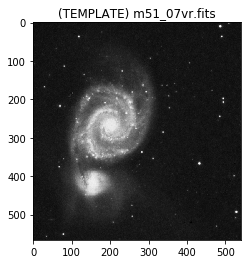

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


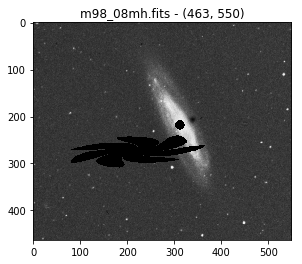

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


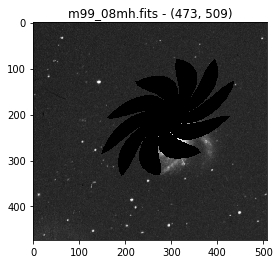

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


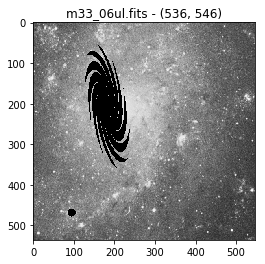

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


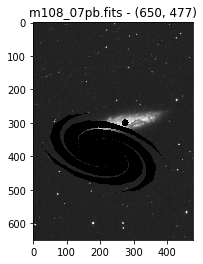

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


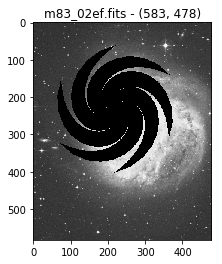

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


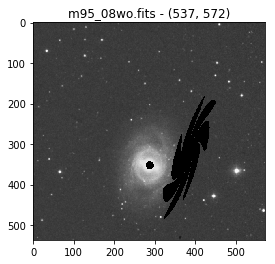

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


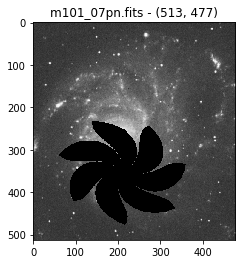

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


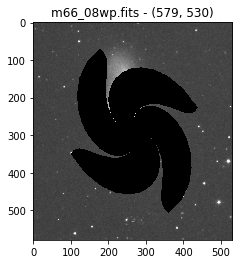

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


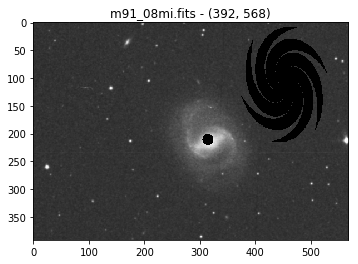

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


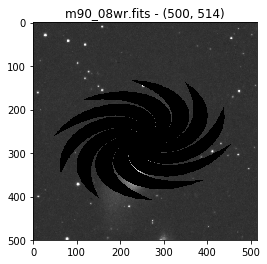

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


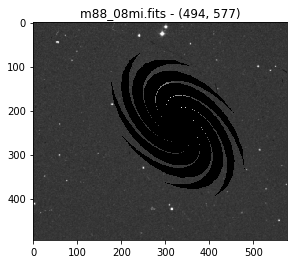

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


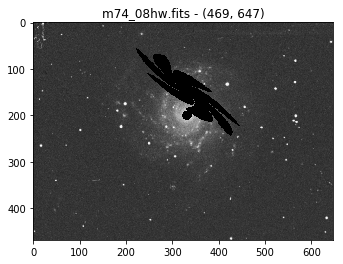

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


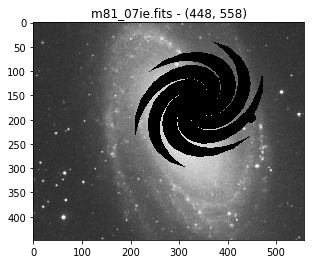

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


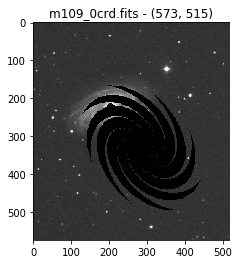

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


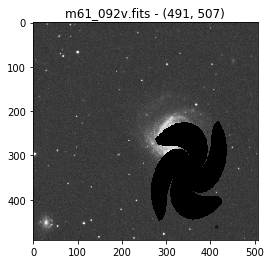

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


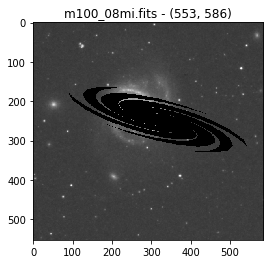

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


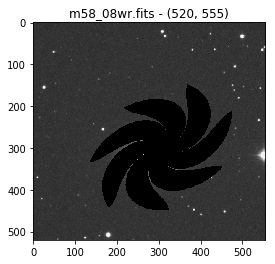

In [3]:
# Parameters:
trim = True # randomly cut the images.
template_index = 4 # index of the template image
directory = "spiral" #ellipti or spiral

# Create container of spiral galaxies:
files = os.listdir(directory)
fname = os.path.join(directory,files[template_index])
template = acalib.io.loadFITS_PrimaryOnly(fname).data
if trim: template = random_trim(template)
# Display template
plt.title("(TEMPLATE) "+files[template_index])
plt.imshow(template,cmap='gray')
plt.show()

# Collect and display images:
images = []
for k in range(len(files)):
    if k==template_index: continue
    d = files[k]
    fname = os.path.join(directory,d)
    cube = acalib.io.loadFITS_PrimaryOnly(fname).data
    if trim: cube = random_trim(cube)
    images.append(cube)
    # Display, also  the centroid:
    cube_w_centroid = np.copy(cube)
    props = acalib.core.transform.fits_props(cube_w_centroid)
    rr, cc = skimage.draw.circle(props['centroid'][0],props['centroid'][1],10,
                                 cube_w_centroid.shape)
    cube_w_centroid[rr,cc] = 0
    plt.title(d+" - "+str(cube_w_centroid.shape))
    plt.imshow(cube_w_centroid,cmap='gray')
    plt.show()

In [4]:
import cProfile
sta = acalib.algorithms.stacking.Stacking()
cProfile.run('sta.run(template,images)')
result = sta.run(template,images)
# Display result
plt.title("RESULT:")
plt.imshow(result,cmap='gray')
plt.show()

         225587 function calls (175579 primitive calls) in 10.861 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       28    0.001    0.000    0.001    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
        1    0.000    0.000   10.861   10.861 <string>:1(<module>)
       45    0.000    0.000    0.000    0.000 _clear_border.py:46(<genexpr>)
       15    0.025    0.002    0.138    0.009 _clear_border.py:5(clear_border)
       15    0.000    0.000    0.000    0.000 _clear_border.py:54(<listcomp>)
      140    0.004    0.000    0.006    0.000 _geometric.py:1074(__init__)
      532    0.000    0.000    0.000    0.000 _geometric.py:1076(<genexpr>)
       56    0.004    0.000    0.013    0.000 _geometric.py:18(_center_and_normalize_points)
       28    0.004    0.000    0.071    0.003 _geometric.py:591(estimate)
       56    0.000    0.000    0.001    0.000 _geometric.py:694(__add__)
       28    0.000    0.000    0.

       27    0.104    0.004    0.267    0.010 transform.py:253(blit_add)
       28    0.000    0.000    0.001    0.000 twodim_base.py:139(eye)
       15    0.000    0.000    0.000    0.000 type_check.py:251(iscomplexobj)
       28    0.001    0.000    0.011    0.000 utils.py:1340(assert_allclose)
       28    0.000    0.000    0.005    0.000 utils.py:1388(compare)
       28    0.001    0.000    0.010    0.000 utils.py:680(assert_array_compare)
       56    0.000    0.000    0.000    0.000 utils.py:688(isnumber)
       28    0.002    0.000    0.015    0.001 utils.py:89(safe_as_int)
       15    0.000    0.000    0.000    0.000 {built-in method _operator.index}
       28    0.001    0.000    0.001    0.000 {built-in method _warnings.warn}
       56    0.000    0.000    0.000    0.000 {built-in method builtins.abs}
      183    0.000    0.000    0.001    0.000 {built-in method builtins.any}
        1    0.000    0.000   10.861   10.861 {built-in method builtins.exec}
      413    0.001   

KeyboardInterrupt: 